In [46]:
from scipy import stats as sci
import numpy as np
import glob
import obspy
from Process import gen_scalograms
import os

eids2=np.load('./Data/All_SWDdp.npy')
eids2[211:260]

array(['texnet2019wkjw', 'texnet2019auzj', 'texnet2019zcii',
       'texnet2019xomu', 'texnet2019prtt', 'texnet2019pzgc',
       'texnet2019djul', 'texnet2019dvel', 'texnet2019aivn',
       'texnet2019ikbc', 'texnet2019alzl', 'texnet2019akyq',
       'texnet2018zcoy', 'texnet2019ixjx', 'texnet2019ciwy',
       'texnet2019dgci', 'texnet2019dgio', 'texnet2019lrol',
       'texnet2019nort', 'texnet2019wrlp', 'texnet2019fbpp',
       'texnet2019gblw', 'texnet2019tpym', 'texnet2019vimg',
       'texnet2019yqik', 'texnet2019xeln', 'texnet2019vlmo',
       'texnet2019mtis', 'texnet2019snzd', 'texnet2019ufqc',
       'texnet2019vmrs', 'texnet2018plud', 'texnet2018ozgw',
       'texnet2019btfz', 'texnet2019xlmh', 'texnet2019dals',
       'texnet2019ysfk', 'texnet2019dezi', 'texnet2019djqb',
       'texnet2018aklf', 'texnet2018zcmp', 'texnet2019tcju',
       'texnet2019yyfw', 'texnet2019eopu', 'texnet2019zoyu',
       'texnet2019lnyj', 'texnet2019dchd', 'texnet2019iidh',
       'texnet2019iilo']

(23, 6000, 3)
P/S ratio: 0.13059026888334085


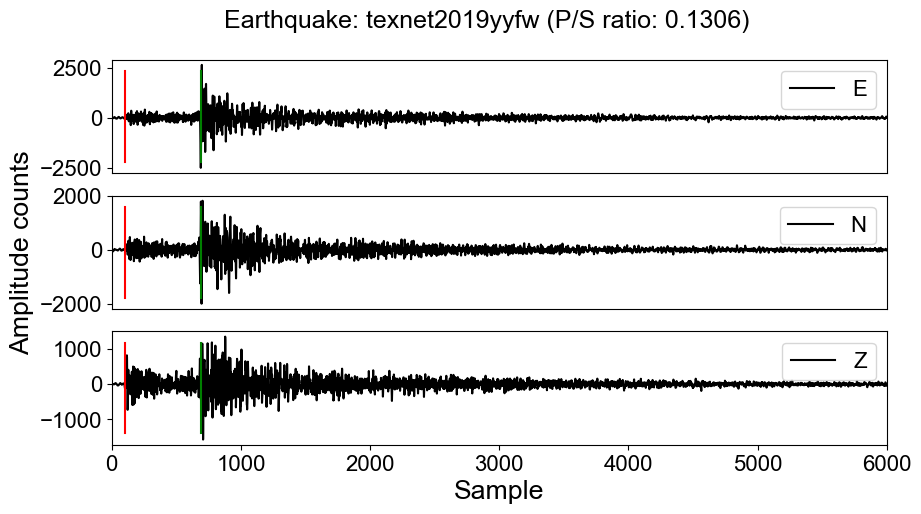

In [47]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

datfin = []

pa = (r'TexNet/events/texnet2019yyfw.qml')
pa1 = (r'TexNet/waveforms/texnet2019yyfw.mseed')
cat = obspy.read_events(pa)
st = obspy.read(pa1)
st = st.resample(100)
st = st.merge(fill_value=0)
st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
st = st.taper(max_percentage=0.001, type='cosine', max_length=2) 

for i in cat[0].picks:
    dat = []
    if i.phase_hint == 'P':
        st2 = st.copy()
        st2 = st2.select(station=i.waveform_id.station_code)
        if len(st2) == 3:
            if len(st2[2].data) >= 6000:
                t = obspy.UTCDateTime(i.time)
                stall = st2.trim(t-1, t+59-0.01)
                a0 = stall[0].data
                a1 = stall[1].data
                a2 = stall[2].data
                if (len(a0) == 6000) and (len(a1) == 6000) and (len(a2) == 6000):
                    dat.append(a0)
                    dat.append(a1)
                    dat.append(a2)

            if (len(a0) == 6000):
                dat = np.array(dat)    
                datfin.append(dat.T) 

print(np.shape(datfin))
datfin = np.array(datfin)

datfin = datfin[2, :, :]

### Calculate the P/S amplitude

p_arrival_samples = [100, 100, 100]  
s_arrival_samples = [690, 690, 690] 

internal = 20
noise_window_size = 20
bp = p_arrival_samples[0] - 20 
ep = p_arrival_samples[0] + 20  
bs = s_arrival_samples[0] - 20  
es = s_arrival_samples[0] + 20  
bn = bp - 3*noise_window_size
en = bp  - noise_window_size

p_energies = []
s_energies = []

Pn = np.var(datfin[bp:ep, 0]) + np.var(datfin[bp:ep, 1]) + np.var(datfin[bp:ep, 2])
Sn = np.var(datfin[bs:es, 0]) + np.var(datfin[bs:es, 1]) + np.var(datfin[bs:es, 2])  
Nn = np.var(datfin[bn:en, 0]) + np.var(datfin[bn:en, 1]) + np.var(datfin[bn:en, 2])
    
p_ener = np.sqrt(Pn - Nn)
    
s_ener = np.sqrt(Sn - Nn)
    
ps_ratio = p_ener / s_ener
p_energies.append(p_ener)
s_energies.append(s_ener)
    
print(f"P/S ratio: {ps_ratio}")

### Plot figure
fig = plt.figure(figsize=(10, 5)) 
ax = [plt.subplot(3, 1, i + 1) for i in range(3)]

font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

kk = ['E', 'N', 'Z']
for c, a in enumerate(ax):
    im = datfin[:, c]
    a.plot(np.arange(len(im)), im, 'k', label=kk[c])
    
    a.axvline(p_arrival_samples[c], color='red', linestyle='-', label='', ymin=0.1, ymax=0.9)
    a.axvline(s_arrival_samples[c], color='green', linestyle='-', label='', ymin=0.1, ymax=0.9)
    
    a.legend(loc='upper right')
    a.set_xlim([0, len(im)])
    
    if c <= 1:
        a.set_xticklabels([])
        a.set_xticks([])
    if c == 1:
        a.set_ylabel('Amplitude counts', fontsize='large', fontweight='normal')
    
a.set_xlabel('Sample', fontsize='large')
fig.suptitle(f"Earthquake: texnet2019yyfw (P/S ratio: {ps_ratio:.4f})", fontsize=18, fontweight='normal')


plt.subplots_adjust(wspace=0, hspace=0.2)  

# fig.savefig('Fig/Fig2/EQ_w.jpg', bbox_inches='tight', transparent=True, dpi=300)

plt.show()


(13, 6000, 3)
P/S ratio: 0.2649735767546936


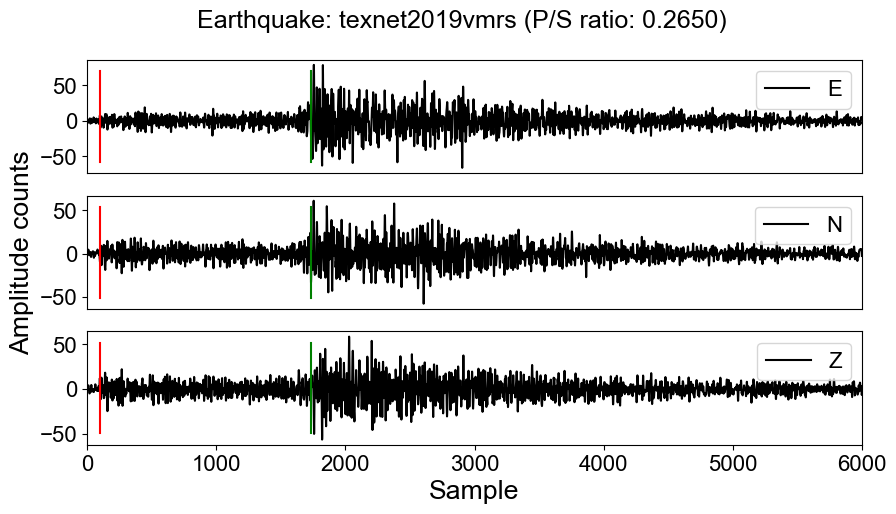

In [48]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

datfin = []

pa = (r'TexNet/events/texnet2019vmrs.qml')
pa1 = (r'TexNet/waveforms/texnet2019vmrs.mseed')
cat = obspy.read_events(pa)
st = obspy.read(pa1)
st = st.resample(100)
st = st.merge(fill_value=0)
st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
st = st.taper(max_percentage=0.001, type='cosine', max_length=2) 

for i in cat[0].picks:
    dat = []
    if i.phase_hint == 'P':
        st2 = st.copy()
        st2 = st2.select(station=i.waveform_id.station_code)
        if len(st2) == 3:
            if len(st2[2].data) >= 6000:
                t = obspy.UTCDateTime(i.time)
                stall = st2.trim(t-1, t+59-0.01)
                a0 = stall[0].data
                a1 = stall[1].data
                a2 = stall[2].data
                if (len(a0) == 6000) and (len(a1) == 6000) and (len(a2) == 6000):
                    dat.append(a0)
                    dat.append(a1)
                    dat.append(a2)

            if (len(a0) == 6000):
                dat = np.array(dat)    
                datfin.append(dat.T) 

print(np.shape(datfin))
datfin = np.array(datfin)

datfin = datfin[3, :, :]

### Calculate the P/S amplitude

p_arrival_samples = [100, 100, 100]  
s_arrival_samples = [1735, 1735, 1735] 

internal = 20
noise_window_size = 20
bp = p_arrival_samples[0] - 20 
ep = p_arrival_samples[0] + 20  
bs = s_arrival_samples[0] - 20  
es = s_arrival_samples[0] + 20  
bn = bp - 3*noise_window_size
en = bp  - noise_window_size

p_energies = []
s_energies = []

Pn = np.var(datfin[bp:ep, 0]) + np.var(datfin[bp:ep, 1]) + np.var(datfin[bp:ep, 2])
Sn = np.var(datfin[bs:es, 0]) + np.var(datfin[bs:es, 1]) + np.var(datfin[bs:es, 2])  
Nn = np.var(datfin[bn:en, 0]) + np.var(datfin[bn:en, 1]) + np.var(datfin[bn:en, 2])
    
p_ener = np.sqrt(Pn - Nn)
    
s_ener = np.sqrt(Sn - Nn)
    
ps_ratio = p_ener / s_ener
p_energies.append(p_ener)
s_energies.append(s_ener)
    
print(f"P/S ratio: {ps_ratio}")

### Plot figure
fig = plt.figure(figsize=(10, 5)) 
ax = [plt.subplot(3, 1, i + 1) for i in range(3)]

font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

kk = ['E', 'N', 'Z']
for c, a in enumerate(ax):
    im = datfin[:, c]
    a.plot(np.arange(len(im)), im, 'k', label=kk[c])
    
    a.axvline(p_arrival_samples[c], color='red', linestyle='-', label='', ymin=0.1, ymax=0.9)
    a.axvline(s_arrival_samples[c], color='green', linestyle='-', label='', ymin=0.1, ymax=0.9)
    
    a.legend(loc='upper right')
    a.set_xlim([0, len(im)])
    
    if c <= 1:
        a.set_xticklabels([])
        a.set_xticks([])
    if c == 1:
        a.set_ylabel('Amplitude counts', fontsize='large', fontweight='normal')
    
a.set_xlabel('Sample', fontsize='large')
fig.suptitle(f"Earthquake: texnet2019vmrs (P/S ratio: {ps_ratio:.4f})", fontsize=18, fontweight='normal')


plt.subplots_adjust(wspace=0, hspace=0.2)  

# fig.savefig('Fig/Fig2/EQ_w.jpg', bbox_inches='tight', transparent=True, dpi=300)

plt.show()


(25, 6000, 3)
P/S ratio: 0.09409778591278384


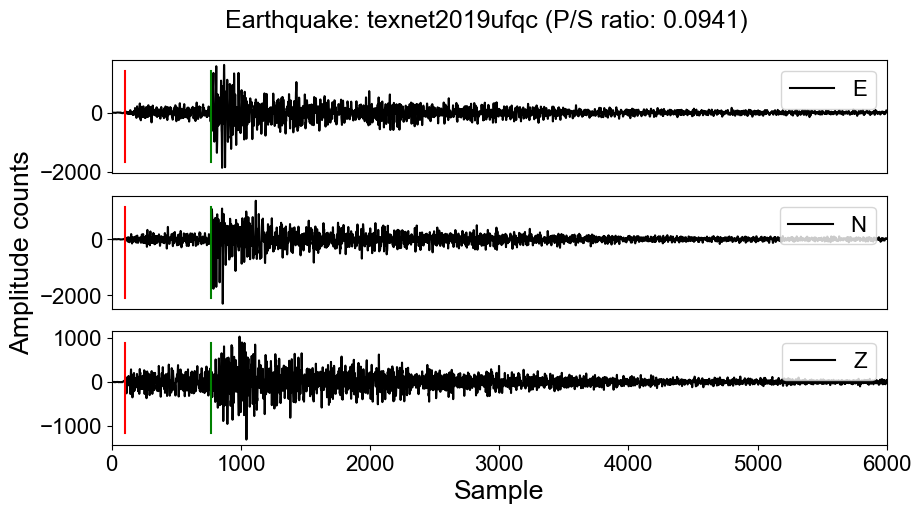

In [49]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

datfin = []

pa = (r'TexNet/events/texnet2019ufqc.qml')
pa1 = (r'TexNet/waveforms/texnet2019ufqc.mseed')
cat = obspy.read_events(pa)
st = obspy.read(pa1)
st = st.resample(100)
st = st.merge(fill_value=0)
st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
st = st.taper(max_percentage=0.001, type='cosine', max_length=2) 

for i in cat[0].picks:
    dat = []
    if i.phase_hint == 'P':
        st2 = st.copy()
        st2 = st2.select(station=i.waveform_id.station_code)
        if len(st2) == 3:
            if len(st2[2].data) >= 6000:
                t = obspy.UTCDateTime(i.time)
                stall = st2.trim(t-1, t+59-0.01)
                a0 = stall[0].data
                a1 = stall[1].data
                a2 = stall[2].data
                if (len(a0) == 6000) and (len(a1) == 6000) and (len(a2) == 6000):
                    dat.append(a0)
                    dat.append(a1)
                    dat.append(a2)

            if (len(a0) == 6000):
                dat = np.array(dat)    
                datfin.append(dat.T) 

print(np.shape(datfin))
datfin = np.array(datfin)

datfin = datfin[1, :, :]

### Calculate the P/S amplitude

p_arrival_samples = [100, 100, 100]  
s_arrival_samples = [770, 770, 770] 

internal = 20
noise_window_size = 20
bp = p_arrival_samples[0] - 20 
ep = p_arrival_samples[0] + 20  
bs = s_arrival_samples[0] - 20  
es = s_arrival_samples[0] + 20  
bn = bp - 3*noise_window_size
en = bp  - noise_window_size

p_energies = []
s_energies = []

Pn = np.var(datfin[bp:ep, 0]) + np.var(datfin[bp:ep, 1]) + np.var(datfin[bp:ep, 2])
Sn = np.var(datfin[bs:es, 0]) + np.var(datfin[bs:es, 1]) + np.var(datfin[bs:es, 2])  
Nn = np.var(datfin[bn:en, 0]) + np.var(datfin[bn:en, 1]) + np.var(datfin[bn:en, 2])
    
p_ener = np.sqrt(Pn - Nn)
    
s_ener = np.sqrt(Sn - Nn)
    
ps_ratio = p_ener / s_ener
p_energies.append(p_ener)
s_energies.append(s_ener)
    
print(f"P/S ratio: {ps_ratio}")

### Plot figure
fig = plt.figure(figsize=(10, 5)) 
ax = [plt.subplot(3, 1, i + 1) for i in range(3)]

font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

kk = ['E', 'N', 'Z']
for c, a in enumerate(ax):
    im = datfin[:, c]
    a.plot(np.arange(len(im)), im, 'k', label=kk[c])
    
    a.axvline(p_arrival_samples[c], color='red', linestyle='-', label='', ymin=0.1, ymax=0.9)
    a.axvline(s_arrival_samples[c], color='green', linestyle='-', label='', ymin=0.1, ymax=0.9)
    
    a.legend(loc='upper right')
    a.set_xlim([0, len(im)])
    
    if c <= 1:
        a.set_xticklabels([])
        a.set_xticks([])
    if c == 1:
        a.set_ylabel('Amplitude counts', fontsize='large', fontweight='normal')
    
a.set_xlabel('Sample', fontsize='large')
fig.suptitle(f"Earthquake: texnet2019ufqc (P/S ratio: {ps_ratio:.4f})", fontsize=18, fontweight='normal')


plt.subplots_adjust(wspace=0, hspace=0.2)  

# fig.savefig('Fig/Fig2/EQ_w.jpg', bbox_inches='tight', transparent=True, dpi=300)

plt.show()


(22, 6000, 3)
P/S ratio: 0.2094486366104534


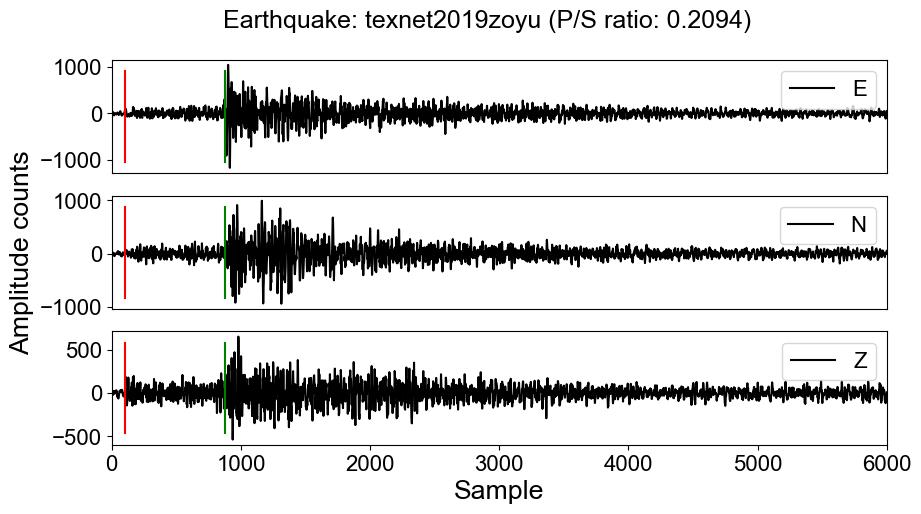

In [50]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

datfin = []

pa = (r'TexNet/events/texnet2019zoyu.qml')
pa1 = (r'TexNet/waveforms/texnet2019zoyu.mseed')
cat = obspy.read_events(pa)
st = obspy.read(pa1)
st = st.resample(100)
st = st.merge(fill_value=0)
st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
st = st.taper(max_percentage=0.001, type='cosine', max_length=2) 

for i in cat[0].picks:
    dat = []
    if i.phase_hint == 'P':
        st2 = st.copy()
        st2 = st2.select(station=i.waveform_id.station_code)
        if len(st2) == 3:
            if len(st2[2].data) >= 6000:
                t = obspy.UTCDateTime(i.time)
                stall = st2.trim(t-1, t+59-0.01)
                a0 = stall[0].data
                a1 = stall[1].data
                a2 = stall[2].data
                if (len(a0) == 6000) and (len(a1) == 6000) and (len(a2) == 6000):
                    dat.append(a0)
                    dat.append(a1)
                    dat.append(a2)

            if (len(a0) == 6000):
                dat = np.array(dat)    
                datfin.append(dat.T) 

print(np.shape(datfin))
datfin = np.array(datfin)

datfin = datfin[4, :, :]

### Calculate the P/S amplitude

p_arrival_samples = [100, 100, 100]  
s_arrival_samples = [875, 875, 875] 

internal = 20
noise_window_size = 20
bp = p_arrival_samples[0] - 20 
ep = p_arrival_samples[0] + 20  
bs = s_arrival_samples[0] - 20  
es = s_arrival_samples[0] + 20  
bn = bp - 3*noise_window_size
en = bp  - noise_window_size

p_energies = []
s_energies = []

Pn = np.var(datfin[bp:ep, 0]) + np.var(datfin[bp:ep, 1]) + np.var(datfin[bp:ep, 2])
Sn = np.var(datfin[bs:es, 0]) + np.var(datfin[bs:es, 1]) + np.var(datfin[bs:es, 2])  
Nn = np.var(datfin[bn:en, 0]) + np.var(datfin[bn:en, 1]) + np.var(datfin[bn:en, 2])
    
p_ener = np.sqrt(Pn - Nn)
    
s_ener = np.sqrt(Sn - Nn)
    
ps_ratio = p_ener / s_ener
p_energies.append(p_ener)
s_energies.append(s_ener)
    
print(f"P/S ratio: {ps_ratio}")

### Plot figure
fig = plt.figure(figsize=(10, 5)) 
ax = [plt.subplot(3, 1, i + 1) for i in range(3)]

font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

kk = ['E', 'N', 'Z']
for c, a in enumerate(ax):
    im = datfin[:, c]
    a.plot(np.arange(len(im)), im, 'k', label=kk[c])
    
    a.axvline(p_arrival_samples[c], color='red', linestyle='-', label='', ymin=0.1, ymax=0.9)
    a.axvline(s_arrival_samples[c], color='green', linestyle='-', label='', ymin=0.1, ymax=0.9)
    
    a.legend(loc='upper right')
    a.set_xlim([0, len(im)])
    
    if c <= 1:
        a.set_xticklabels([])
        a.set_xticks([])
    if c == 1:
        a.set_ylabel('Amplitude counts', fontsize='large', fontweight='normal')
    
a.set_xlabel('Sample', fontsize='large')
fig.suptitle(f"Earthquake: texnet2019zoyu (P/S ratio: {ps_ratio:.4f})", fontsize=18, fontweight='normal')


plt.subplots_adjust(wspace=0, hspace=0.2)  

# fig.savefig('Fig/Fig2/EQ_w.jpg', bbox_inches='tight', transparent=True, dpi=300)

plt.show()
